### WETC score from paper: Coherence-Aware Neural Topic Modeling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#kmeans wetc
Kmeans={10: [0.6234946429848713, 0.2595275335212134, 0.17533100542659225, 0.127185639422508, 0.10517358538678298],
20: [0.6047835502350811, 0.2511559546120604, 0.16394698270464253, 0.1157185925998945, 0.08409139437083281],
30: [0.6619394705421716, 0.28144655285704323, 0.1657124245762021, 0.12416066742510234, 0.09296073272378982],
40: [0.6769856434886726, 0.2633167193431679, 0.1655024988732813, 0.1142423352668677, 0.08733319699353638],
50: [0.655855480487714, 0.2898335955494226, 0.16792091229285763, 0.12668729539107948, 0.09194818296668045],
60: [0.6553605415397425, 0.2948444835255295, 0.17282290631665287, 0.11849068407413058, 0.09146990323027276],
70: [0.6961222469678996, 0.2792594617415, 0.17480615752051923, 0.12664945250743598, 0.10125547836925845],
80: [0.6228296015924292, 0.29742942787096033, 0.1642570232358493, 0.1262117939280552, 0.09258092515367732],
90: [0.7279342598663683, 0.3144013010908778, 0.18044279439329358, 0.12628395640562556, 0.09483039819998165],
100: [0.6948645580160693, 0.2904441505088291, 0.17417044339506343, 0.11871651370040341, 0.088963917984737]}


#nmf wetc
NMF={10: [0.8732670693054336, 0.5034355706053969, 0.29179804859251385, 0.23186595639767563, 0.21250311845931097],
20: [0.7421988874221463, 0.2522596309636239, 0.24596245941478764, 0.21678096117526527, 0.15622242635885597],
30: [0.7318895284260308, 0.3686265933904729, 0.24866124605976805, 0.1688463965670535, 0.14429453944578122],
40: [0.5917025604651347, 0.2951475125209472, 0.21686670904560224, 0.15476674454401856, 0.14311375283030278],
50: [0.6103639246716853, 0.2608046136032185, 0.23621698402978006, 0.14617127151056047, 0.1205577011695439],
60: [0.5101107249892293, 0.26890664986813534, 0.1949100661170084, 0.14764475366850754, 0.10746801443382036],
70: [0.5579768053566844, 0.2554002194346474, 0.17562831392159534, 0.14991336967178817, 0.10657825784976344],
80: [0.5173428716691997, 0.24281479180731017, 0.17077658656889894, 0.1337264306063565, 0.11815403904525143],
90: [0.5247045403756767, 0.26746527235674733, 0.181396670368178, 0.11441203443518445, 0.11272947444725805],
100: [0.5791716958813666, 0.2675413876252615, 0.1703228801154959, 0.13342094790375078, 0.10552289843236787]}


#ae-sa wetc
SA={10: [0.7149774359660874, 0.3351722635320916, 0.18500098295107156, 0.18747856388592427, 0.09640917724362437],
20: [1.0746845973232868, 0.4737222997703168, 0.27357971981097673, 0.1916061184621992, 0.15750834778693715],
30: [0.9212103225230858, 0.45846989887148354, 0.26889530013714374, 0.18817037738792067, 0.14423822918779436],
40: [1.1023584572645262, 0.4243026679713572, 0.2780845169808631, 0.2117566483101155, 0.13581013455138186],
50: [0.9801165412338821, 0.4413442884157319, 0.27582543226789796, 0.1831282647023847, 0.13233491290455707],
60: [1.0698720645879252, 0.43047241802876957, 0.24028382488994687, 0.18597848605350625, 0.13259447544719086],
70: [1.0728013015723266, 0.4221610043954949, 0.2783491595865914, 0.16846099932826447, 0.1287783973003909],
80: [0.9883747217047455, 0.443877545208417, 0.2591305147197488, 0.17841065287902752, 0.13560132240233333],
90: [1.033916490145014, 0.43625114222865446, 0.26076314648552973, 0.18031008851319072, 0.1312546374812494],
100: [1.0134375937703672, 0.44241656321626377, 0.2686921249362383, 0.16999634857266874, 0.1334743383414535]}


#ae-csa wetc
SACSA={10: [0.7397058464039253, 0.3257147609185167, 0.24865198846954853, 0.17849245628443997, 0.11777087598044882],
20: [0.9178215556126776, 0.3897895481973523, 0.2218202479853808, 0.19408409385689196, 0.11685483546175986],
30: [0.9438365326075604, 0.3477703274530072, 0.2286315838850278, 0.1731461471198029, 0.12347766454205052],
40: [0.9584933708771122, 0.39013487550060266, 0.21305262499597374, 0.16535002751532477, 0.11912196567434774],
50: [0.9123940424286482, 0.3267634342931746, 0.17719261769478176, 0.13763630487018896, 0.10509337484767527],
60: [0.8548733906649962, 0.3421762134284626, 0.20965819399935734, 0.148670507160001, 0.10343641132621756],
70: [1.0069397227044068, 0.3459960634611451, 0.20517509579447857, 0.1514844744970525, 0.10102197504738819],
80: [0.928412478409643, 0.37655130640439577, 0.219021329338134, 0.15135203014430443, 0.09578250179236429],
90: [0.8411611809364479, 0.31052848433381336, 0.1914694126048184, 0.1355263595436299, 0.10162989964933465],
100: [0.7857114307199795, 0.3256762083947959, 0.18394684092043875, 0.1300141482634396, 0.09926365786053612]}


#abae wetc
ABAE={10: [0.5935544387797584, 0.2887757822105208, 0.1824264404384195, 0.13088313885858435, 0.1092144457438367],
20: [0.9404018231984329, 0.3768374948543617, 0.2464076614964968, 0.18523006056836042, 0.1255213657296535],
30: [0.9454324473976374, 0.42955661972926856, 0.22632225120082056, 0.1586447428624, 0.11895415783274414],
40: [0.9711999758673441, 0.42612709618904115, 0.23288336620039493, 0.1518013279650818, 0.11770064023757806],
50: [0.7866755459074491, 0.4210380614238934, 0.2081603279239281, 0.16356775651427147, 0.10656577593260241],
60: [0.8613603115385658, 0.3772077223089625, 0.22301263756845735, 0.16315750017588498, 0.11049851120248526],
70: [0.9394784005368564, 0.3874829582711738, 0.21342571413785558, 0.15749808807843044, 0.10806522585329205],
80: [0.913318688296323, 0.3775974799737985, 0.22258740391413623, 0.14601633163173072, 0.10897518015434948],
90: [0.9322489542873154, 0.3679817288747035, 0.22473196082020247, 0.13803086977508455, 0.10287361100645245],
100: [0.8082031211219578, 0.34893476639853654, 0.2026330962662576, 0.13942632906873464, 0.10790543702248342]}


ABAE_SH={10: [1.2045218292524513, 0.4003393734486105, 0.2897780263106567, 0.22799015749093637, 0.16373897236687335],
20: [1.0615678490475682, 0.5201483778128565, 0.20664184931692048, 0.1479021021426723, 0.12366482463848964],
30: [0.982642320928359, 0.3522355917285121, 0.14802752375884276, 0.11192784089159893, 0.12074602394413972],
40: [0.7166203882406652, 0.3121380005676234, 0.17214373441122938, 0.10339439626025329, 0.06203594856539226],
50: [0.5551981520902892, 0.26260627772826095, 0.13121716898607164, 0.08356500439835618, 0.0836181252269193],
60: [0.5657987831904842, 0.21701423815127455, 0.12586578564542303, 0.09872444944873485, 0.06869841223353597],
70: [0.5372377454369962, 0.2383715380013625, 0.1371093519181577, 0.09427968682602715, 0.07170002961020422],
80: [0.5289573193104984, 0.17978657862768896, 0.12680411665755523, 0.09064986755020726, 0.07217072364322386],
90: [0.46899413799410244, 0.16756763993041088, 0.1351858474537844, 0.09269459013806952, 0.05976076346582625],
100: [0.4671237538925454, 0.18926233426555983, 0.12695867352782314, 0.0798162731311679, 0.0646351470689938]}

In [3]:
list(ABAE.keys())

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [5]:
N=[10,20,30,40,50]
Model=['ABAE','Kmeans','AE-SA','AE-CSA','NMF','ABAE_SH']

## Modelwise visualization

In [6]:
abaedf=pd.DataFrame(ABAE, columns=[10,20,30,40,50,60,70,80,90,100])
#abaedft=abaedf.T
abaedf.columns=list(ABAE.keys())
abaedf['N']=N
abaedf

,10,20,30,40,50,60,70,80,90,100,N
0,0.593554,0.940402,0.945432,0.971200,0.786676,0.861360,0.939478,0.913319,0.932249,0.808203,10
1,0.288776,0.376837,0.429557,0.426127,0.421038,0.377208,0.387483,0.377597,0.367982,0.348935,20
2,0.182426,0.246408,0.226322,0.232883,0.208160,0.223013,0.213426,0.222587,0.224732,0.202633,30
3,0.130883,0.185230,0.158645,0.151801,0.163568,0.163158,0.157498,0.146016,0.138031,0.139426,40
4,0.109214,0.125521,0.118954,0.117701,0.106566,0.110499,0.108065,0.108975,0.102874,0.107905,50


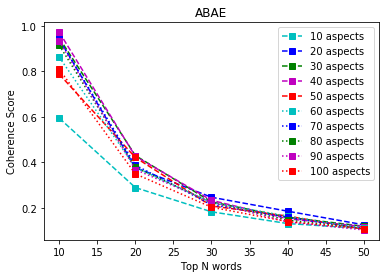

In [7]:
fig, ax = plt.subplots()
abaedf.plot(kind='line',x='N',y=10,style='cs--', ax=ax, label='10 aspects')
abaedf.plot(kind='line',x='N',y=20,style='bs--', ax=ax, label='20 aspects')
abaedf.plot(kind='line',x='N',y=30,style='gs--', ax=ax, label='30 aspects')
abaedf.plot(kind='line',x='N',y=40,style='ms--', ax=ax, label='40 aspects')
abaedf.plot(kind='line',x='N',y=50,style='rs--', ax=ax, label='50 aspects')
abaedf.plot(kind='line',x='N',y=60,style='cs:', ax=ax, label='60 aspects')
abaedf.plot(kind='line',x='N',y=70,style='bs:', ax=ax, label='70 aspects')
abaedf.plot(kind='line',x='N',y=80,style='gs:', ax=ax, label='80 aspects')
abaedf.plot(kind='line',x='N',y=90,style='ms:', ax=ax, label='90 aspects')
abaedf.plot(kind='line',x='N',y=100,style='rs:', ax=ax, label='100 aspects')
plt.xlabel('Top N words')
plt.ylabel('Coherence Score')
plt.title('ABAE')
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig('WETC Coherence Plots\Plot_per_model\\ABAE_WETC.pdf', bbox_inches='tight')

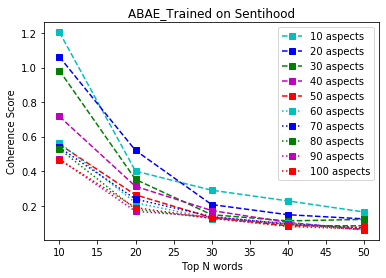

In [8]:
abaeshdf=pd.DataFrame(ABAE_SH, columns=[10,20,30,40,50,60,70,80,90,100])
#abaedft=abaedf.T
abaeshdf.columns=list(ABAE_SH.keys())
abaeshdf['N']=N
abaeshdf

fig, ax = plt.subplots()
abaeshdf.plot(kind='line',x='N',y=10,style='cs--', ax=ax, label='10 aspects')
abaeshdf.plot(kind='line',x='N',y=20,style='bs--', ax=ax, label='20 aspects')
abaeshdf.plot(kind='line',x='N',y=30,style='gs--', ax=ax, label='30 aspects')
abaeshdf.plot(kind='line',x='N',y=40,style='ms--', ax=ax, label='40 aspects')
abaeshdf.plot(kind='line',x='N',y=50,style='rs--', ax=ax, label='50 aspects')
abaeshdf.plot(kind='line',x='N',y=60,style='cs:', ax=ax, label='60 aspects')
abaeshdf.plot(kind='line',x='N',y=70,style='bs:', ax=ax, label='70 aspects')
abaeshdf.plot(kind='line',x='N',y=80,style='gs:', ax=ax, label='80 aspects')
abaeshdf.plot(kind='line',x='N',y=90,style='ms:', ax=ax, label='90 aspects')
abaeshdf.plot(kind='line',x='N',y=100,style='rs:', ax=ax, label='100 aspects')
plt.xlabel('Top N words')
plt.ylabel('Coherence Score')
plt.title('ABAE_Trained on Sentihood')
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig('WETC Coherence Plots\Plot_per_model\\ABAE_SH_WETC.pdf', bbox_inches='tight')

In [10]:
Kmeansdf=pd.DataFrame(Kmeans)
#abaedft=abaedf.T
Kmeansdf.columns=list(Kmeans.keys())
Kmeansdf['N']=N
Kmeansdf

,10,20,30,40,50,60,70,80,90,100,N
0,0.623495,0.604784,0.661939,0.676986,0.655855,0.655361,0.696122,0.622830,0.727934,0.694865,10
1,0.259528,0.251156,0.281447,0.263317,0.289834,0.294844,0.279259,0.297429,0.314401,0.290444,20
2,0.175331,0.163947,0.165712,0.165502,0.167921,0.172823,0.174806,0.164257,0.180443,0.174170,30
3,0.127186,0.115719,0.124161,0.114242,0.126687,0.118491,0.126649,0.126212,0.126284,0.118717,40
4,0.105174,0.084091,0.092961,0.087333,0.091948,0.091470,0.101255,0.092581,0.094830,0.088964,50


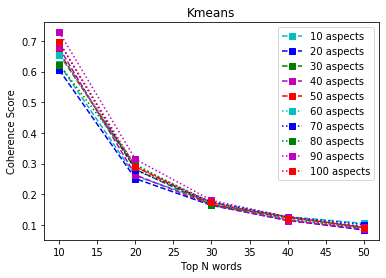

In [11]:
fig, ax = plt.subplots()
Kmeansdf.plot(kind='line',x='N',y=10,style='cs--', ax=ax, label='10 aspects')
Kmeansdf.plot(kind='line',x='N',y=20,style='bs--', ax=ax, label='20 aspects')
Kmeansdf.plot(kind='line',x='N',y=30,style='gs--', ax=ax, label='30 aspects')
Kmeansdf.plot(kind='line',x='N',y=40,style='ms--', ax=ax, label='40 aspects')
Kmeansdf.plot(kind='line',x='N',y=50,style='rs--', ax=ax, label='50 aspects')
Kmeansdf.plot(kind='line',x='N',y=60,style='cs:', ax=ax, label='60 aspects')
Kmeansdf.plot(kind='line',x='N',y=70,style='bs:', ax=ax, label='70 aspects')
Kmeansdf.plot(kind='line',x='N',y=80,style='gs:', ax=ax, label='80 aspects')
Kmeansdf.plot(kind='line',x='N',y=90,style='ms:', ax=ax, label='90 aspects')
Kmeansdf.plot(kind='line',x='N',y=100,style='rs:', ax=ax, label='100 aspects')
plt.xlabel('Top N words')
plt.ylabel('Coherence Score')
plt.title('Kmeans')
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig('WETC Coherence Plots\Plot_per_model\\KMeans_WETC.pdf', bbox_inches='tight')

In [12]:
NMFdf=pd.DataFrame(NMF)
#abaedft=abaedf.T
NMFdf.columns=list(NMFdf.keys())
NMFdf['N']=N
NMFdf

,10,20,30,40,50,60,70,80,90,100,N
0,0.873267,0.742199,0.731890,0.591703,0.610364,0.510111,0.557977,0.517343,0.524705,0.579172,10
1,0.503436,0.252260,0.368627,0.295148,0.260805,0.268907,0.255400,0.242815,0.267465,0.267541,20
2,0.291798,0.245962,0.248661,0.216867,0.236217,0.194910,0.175628,0.170777,0.181397,0.170323,30
3,0.231866,0.216781,0.168846,0.154767,0.146171,0.147645,0.149913,0.133726,0.114412,0.133421,40
4,0.212503,0.156222,0.144295,0.143114,0.120558,0.107468,0.106578,0.118154,0.112729,0.105523,50


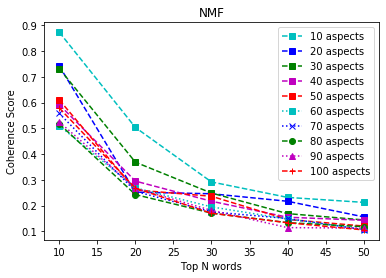

In [13]:
fig, ax = plt.subplots()
NMFdf.plot(kind='line',x='N',y=10,style='cs--', ax=ax, label='10 aspects')
NMFdf.plot(kind='line',x='N',y=20,style='bs--', ax=ax, label='20 aspects')
NMFdf.plot(kind='line',x='N',y=30,style='gs--', ax=ax, label='30 aspects')
NMFdf.plot(kind='line',x='N',y=40,style='ms--', ax=ax, label='40 aspects')
NMFdf.plot(kind='line',x='N',y=50,style='rs--', ax=ax, label='50 aspects')
NMFdf.plot(kind='line',x='N',y=60,style='cs:', ax=ax, label='60 aspects')
NMFdf.plot(kind='line',x='N',y=70,style='bx:', ax=ax, label='70 aspects')
NMFdf.plot(kind='line',x='N',y=80,linestyle='--',marker='o',color='g',ax=ax, label='80 aspects')
NMFdf.plot(kind='line',x='N',y=90,style='m^:', ax=ax, label='90 aspects')
NMFdf.plot(kind='line',x='N',y=100,style='r+--', ax=ax, label='100 aspects')
plt.xlabel('Top N words')
plt.ylabel('Coherence Score')
plt.title('NMF')
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig('WETC Coherence Plots\Plot_per_model\\NMF_WETC.pdf', bbox_inches='tight')

In [14]:
SAdf=pd.DataFrame(SA)
#abaedft=abaedf.T
SAdf.columns=list(SA.keys())
SAdf['N']=N
SAdf

,10,20,30,40,50,60,70,80,90,100,N
0,0.714977,1.074685,0.921210,1.102358,0.980117,1.069872,1.072801,0.988375,1.033916,1.013438,10
1,0.335172,0.473722,0.458470,0.424303,0.441344,0.430472,0.422161,0.443878,0.436251,0.442417,20
2,0.185001,0.273580,0.268895,0.278085,0.275825,0.240284,0.278349,0.259131,0.260763,0.268692,30
3,0.187479,0.191606,0.188170,0.211757,0.183128,0.185978,0.168461,0.178411,0.180310,0.169996,40
4,0.096409,0.157508,0.144238,0.135810,0.132335,0.132594,0.128778,0.135601,0.131255,0.133474,50


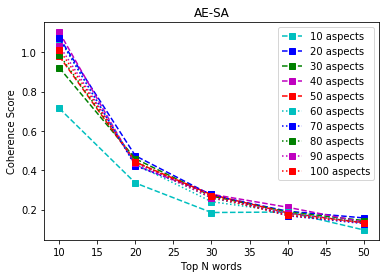

In [15]:
fig, ax = plt.subplots()
SAdf.plot(kind='line',x='N',y=10,style='cs--', ax=ax, label='10 aspects')
SAdf.plot(kind='line',x='N',y=20,style='bs--', ax=ax, label='20 aspects')
SAdf.plot(kind='line',x='N',y=30,style='gs--', ax=ax, label='30 aspects')
SAdf.plot(kind='line',x='N',y=40,style='ms--', ax=ax, label='40 aspects')
SAdf.plot(kind='line',x='N',y=50,style='rs--', ax=ax, label='50 aspects')
SAdf.plot(kind='line',x='N',y=60,style='cs:', ax=ax, label='60 aspects')
SAdf.plot(kind='line',x='N',y=70,style='bs:', ax=ax, label='70 aspects')
SAdf.plot(kind='line',x='N',y=80,style='gs:', ax=ax, label='80 aspects')
SAdf.plot(kind='line',x='N',y=90,style='ms:', ax=ax, label='90 aspects')
SAdf.plot(kind='line',x='N',y=100,style='rs:', ax=ax, label='100 aspects')
plt.xlabel('Top N words')
plt.ylabel('Coherence Score')
plt.title('AE-SA')
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig('WETC Coherence Plots\Plot_per_model\\AE-SA_WETC.pdf', bbox_inches='tight')

In [16]:
SACSAdf=pd.DataFrame(SACSA)
#abaedft=abaedf.T
SACSAdf.columns=list(SACSA.keys())
SACSAdf['N']=N
SACSAdf

,10,20,30,40,50,60,70,80,90,100,N
0,0.739706,0.917822,0.943837,0.958493,0.912394,0.854873,1.006940,0.928412,0.841161,0.785711,10
1,0.325715,0.389790,0.347770,0.390135,0.326763,0.342176,0.345996,0.376551,0.310528,0.325676,20
2,0.248652,0.221820,0.228632,0.213053,0.177193,0.209658,0.205175,0.219021,0.191469,0.183947,30
3,0.178492,0.194084,0.173146,0.165350,0.137636,0.148671,0.151484,0.151352,0.135526,0.130014,40
4,0.117771,0.116855,0.123478,0.119122,0.105093,0.103436,0.101022,0.095783,0.101630,0.099264,50


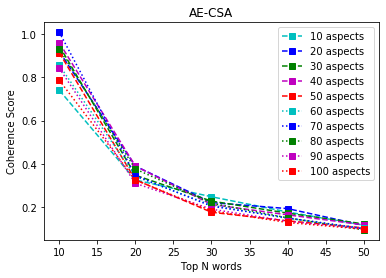

In [18]:
fig, ax = plt.subplots()
SACSAdf.plot(kind='line',x='N',y=10,style='cs--', ax=ax, label='10 aspects')
SACSAdf.plot(kind='line',x='N',y=20,style='bs--', ax=ax, label='20 aspects')
SACSAdf.plot(kind='line',x='N',y=30,style='gs--', ax=ax, label='30 aspects')
SACSAdf.plot(kind='line',x='N',y=40,style='ms--', ax=ax, label='40 aspects')
SACSAdf.plot(kind='line',x='N',y=50,style='rs--', ax=ax, label='50 aspects')
SACSAdf.plot(kind='line',x='N',y=60,style='cs:', ax=ax, label='60 aspects')
SACSAdf.plot(kind='line',x='N',y=70,style='bs:', ax=ax, label='70 aspects')
SACSAdf.plot(kind='line',x='N',y=80,style='gs:', ax=ax, label='80 aspects')
SACSAdf.plot(kind='line',x='N',y=90,style='ms:', ax=ax, label='90 aspects')
SACSAdf.plot(kind='line',x='N',y=100,style='rs:', ax=ax, label='100 aspects')
plt.xlabel('Top N words')
plt.ylabel('Coherence Score')
plt.title('AE-CSA')
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig('WETC Coherence Plots\Plot_per_model\\AE-CSA_WETC.pdf', bbox_inches='tight')

## Aspectwise visualization

In [19]:
K10=[list(d.values())[0] for d in [ABAE,Kmeans,SA,SACSA,NMF, ABAE_SH]]
K20=[list(d.values())[1] for d in [ABAE,Kmeans,SA,SACSA,NMF, ABAE_SH]]
K30=[list(d.values())[2] for d in [ABAE,Kmeans,SA,SACSA,NMF, ABAE_SH]]
K40=[list(d.values())[3] for d in [ABAE,Kmeans,SA,SACSA,NMF, ABAE_SH]]
K50=[list(d.values())[4] for d in [ABAE,Kmeans,SA,SACSA,NMF, ABAE_SH]]
K60=[list(d.values())[5] for d in [ABAE,Kmeans,SA,SACSA,NMF, ABAE_SH]]
K70=[list(d.values())[6] for d in [ABAE,Kmeans,SA,SACSA,NMF, ABAE_SH]]
K80=[list(d.values())[7] for d in [ABAE,Kmeans,SA,SACSA,NMF, ABAE_SH]]
K90=[list(d.values())[8] for d in [ABAE,Kmeans,SA,SACSA,NMF, ABAE_SH]]
K100=[list(d.values())[9] for d in [ABAE,Kmeans,SA,SACSA,NMF, ABAE_SH]]



In [20]:
N=[10,20,30,40,50]
Model=['ABAE','Kmeans','SA','SACSA','NMF','ABAE_SH']

In [21]:
df=pd.DataFrame(K10,columns=N)
dft=df.T
dft.columns=Model
dft['N']=N
dft

,ABAE,Kmeans,SA,SACSA,NMF,ABAE_SH,N
10,0.593554,0.623495,0.714977,0.739706,0.873267,1.204522,10
20,0.288776,0.259528,0.335172,0.325715,0.503436,0.400339,20
30,0.182426,0.175331,0.185001,0.248652,0.291798,0.289778,30
40,0.130883,0.127186,0.187479,0.178492,0.231866,0.227990,40
50,0.109214,0.105174,0.096409,0.117771,0.212503,0.163739,50


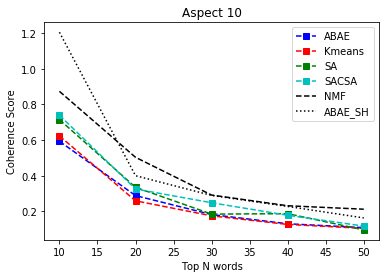

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

styles1 = ['bs-','ro-','y^-']
styles2 = ['rs-','go-','b^-']
fig, ax = plt.subplots()
dft.plot(kind='line',x='N',y='ABAE',style='bs--', ax=ax)
dft.plot(kind='line',x='N',y='Kmeans',style='rs--', ax=ax)
dft.plot(kind='line',x='N',y='SA',style='gs--', ax=ax)
dft.plot(kind='line',x='N',y='SACSA',style='cs--', ax=ax)
dft.plot(kind='line',x='N',y='NMF',style='k--', ax=ax)
dft.plot(kind='line',x='N',y='ABAE_SH',style='k:', ax=ax)
plt.xlabel('Top N words')
plt.ylabel('Coherence Score')
plt.title('Aspect 10')
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig('WETC Coherence Plots\Plot_per_aspect_size\\Aspect10_WETC.pdf', bbox_inches='tight')

In [23]:
df20=pd.DataFrame(K20)
df20t=df20.T
df20t.columns=Model
df20t['N']=N
df20t

,ABAE,Kmeans,SA,SACSA,NMF,ABAE_SH,N
0,0.940402,0.604784,1.074685,0.917822,0.742199,1.061568,10
1,0.376837,0.251156,0.473722,0.389790,0.252260,0.520148,20
2,0.246408,0.163947,0.273580,0.221820,0.245962,0.206642,30
3,0.185230,0.115719,0.191606,0.194084,0.216781,0.147902,40
4,0.125521,0.084091,0.157508,0.116855,0.156222,0.123665,50


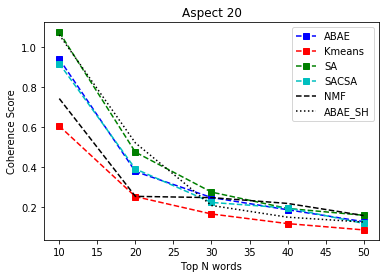

In [24]:
fig, ax = plt.subplots()
df20t.plot(kind='line',x='N',y='ABAE',style='bs--', ax=ax)
df20t.plot(kind='line',x='N',y='Kmeans',style='rs--', ax=ax)
df20t.plot(kind='line',x='N',y='SA',style='gs--', ax=ax)
df20t.plot(kind='line',x='N',y='SACSA',style='cs--', ax=ax)
df20t.plot(kind='line',x='N',y='NMF',style='k--', ax=ax)
df20t.plot(kind='line',x='N',y='ABAE_SH',style='k:', ax=ax)

plt.xlabel('Top N words')
plt.ylabel('Coherence Score')
plt.title('Aspect 20')
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig('WETC Coherence Plots\Plot_per_aspect_size\\Aspect20_WETC.pdf', bbox_inches='tight')

In [25]:
df30=pd.DataFrame(K30)
df30t=df30.T
df30t.columns=Model
df30t['N']=N
df30t

,ABAE,Kmeans,SA,SACSA,NMF,ABAE_SH,N
0,0.945432,0.661939,0.921210,0.943837,0.731890,0.982642,10
1,0.429557,0.281447,0.458470,0.347770,0.368627,0.352236,20
2,0.226322,0.165712,0.268895,0.228632,0.248661,0.148028,30
3,0.158645,0.124161,0.188170,0.173146,0.168846,0.111928,40
4,0.118954,0.092961,0.144238,0.123478,0.144295,0.120746,50


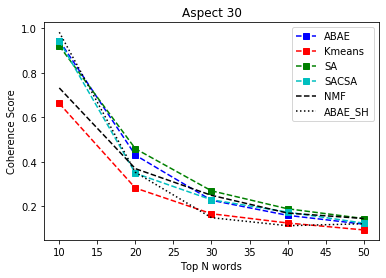

In [27]:
fig, ax = plt.subplots()
df30t.plot(kind='line',x='N',y='ABAE',style='bs--', ax=ax)
df30t.plot(kind='line',x='N',y='Kmeans',style='rs--', ax=ax)
df30t.plot(kind='line',x='N',y='SA',style='gs--', ax=ax)
df30t.plot(kind='line',x='N',y='SACSA',style='cs--', ax=ax)
df30t.plot(kind='line',x='N',y='NMF',style='k--', ax=ax)
df30t.plot(kind='line',x='N',y='ABAE_SH',style='k:', ax=ax)

plt.xlabel('Top N words')
plt.ylabel('Coherence Score')
plt.title('Aspect 30')
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig('WETC Coherence Plots\Plot_per_aspect_size\\Aspect30_WETC.pdf', bbox_inches='tight')


In [28]:
df40=pd.DataFrame(K40)
df40t=df40.T
df40t.columns=Model
df40t['N']=N
df40t

,ABAE,Kmeans,SA,SACSA,NMF,ABAE_SH,N
0,0.971200,0.676986,1.102358,0.958493,0.591703,0.716620,10
1,0.426127,0.263317,0.424303,0.390135,0.295148,0.312138,20
2,0.232883,0.165502,0.278085,0.213053,0.216867,0.172144,30
3,0.151801,0.114242,0.211757,0.165350,0.154767,0.103394,40
4,0.117701,0.087333,0.135810,0.119122,0.143114,0.062036,50


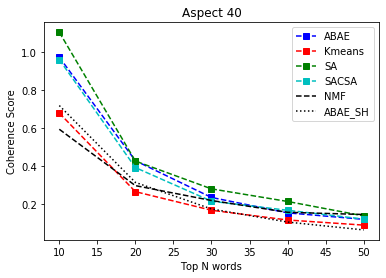

In [29]:
fig, ax = plt.subplots()
df40t.plot(kind='line',x='N',y='ABAE',style='bs--', ax=ax)
df40t.plot(kind='line',x='N',y='Kmeans',style='rs--', ax=ax)
df40t.plot(kind='line',x='N',y='SA',style='gs--', ax=ax)
df40t.plot(kind='line',x='N',y='SACSA',style='cs--', ax=ax)
df40t.plot(kind='line',x='N',y='NMF',style='k--', ax=ax)
df40t.plot(kind='line',x='N',y='ABAE_SH',style='k:', ax=ax)

plt.xlabel('Top N words')
plt.ylabel('Coherence Score')
plt.title('Aspect 40')
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig('WETC Coherence Plots\Plot_per_aspect_size\\Aspect40_WETC.pdf', bbox_inches='tight')

In [30]:
df50=pd.DataFrame(K50)
df50t=df50.T
df50t.columns=Model
df50t['N']=N
df50t

,ABAE,Kmeans,SA,SACSA,NMF,ABAE_SH,N
0,0.786676,0.655855,0.980117,0.912394,0.610364,0.555198,10
1,0.421038,0.289834,0.441344,0.326763,0.260805,0.262606,20
2,0.208160,0.167921,0.275825,0.177193,0.236217,0.131217,30
3,0.163568,0.126687,0.183128,0.137636,0.146171,0.083565,40
4,0.106566,0.091948,0.132335,0.105093,0.120558,0.083618,50


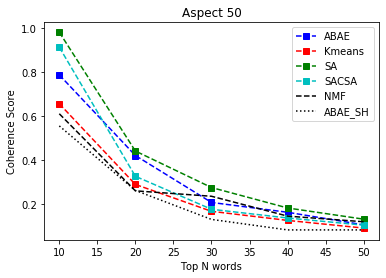

In [31]:
fig, ax = plt.subplots()
df50t.plot(kind='line',x='N',y='ABAE',style='bs--', ax=ax)
df50t.plot(kind='line',x='N',y='Kmeans',style='rs--', ax=ax)
df50t.plot(kind='line',x='N',y='SA',style='gs--', ax=ax)
df50t.plot(kind='line',x='N',y='SACSA',style='cs--', ax=ax)
df50t.plot(kind='line',x='N',y='NMF',style='k--', ax=ax)
df50t.plot(kind='line',x='N',y='ABAE_SH',style='k:', ax=ax)

plt.xlabel('Top N words')
plt.ylabel('Coherence Score')
plt.title('Aspect 50')
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig('WETC Coherence Plots\Plot_per_aspect_size\\Aspect50_WETC.pdf', bbox_inches='tight')

In [32]:
df60=pd.DataFrame(K60)
df60t=df60.T
df60t.columns=Model
df60t['N']=N
df60t

,ABAE,Kmeans,SA,SACSA,NMF,ABAE_SH,N
0,0.861360,0.655361,1.069872,0.854873,0.510111,0.565799,10
1,0.377208,0.294844,0.430472,0.342176,0.268907,0.217014,20
2,0.223013,0.172823,0.240284,0.209658,0.194910,0.125866,30
3,0.163158,0.118491,0.185978,0.148671,0.147645,0.098724,40
4,0.110499,0.091470,0.132594,0.103436,0.107468,0.068698,50


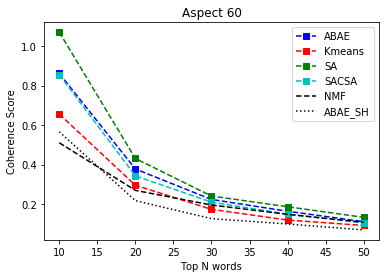

In [33]:
fig, ax = plt.subplots()
df60t.plot(kind='line',x='N',y='ABAE',style='bs--', ax=ax)
df60t.plot(kind='line',x='N',y='Kmeans',style='rs--', ax=ax)
df60t.plot(kind='line',x='N',y='SA',style='gs--', ax=ax)
df60t.plot(kind='line',x='N',y='SACSA',style='cs--', ax=ax)
df60t.plot(kind='line',x='N',y='NMF',style='k--', ax=ax)
df60t.plot(kind='line',x='N',y='ABAE_SH',style='k:', ax=ax)

plt.xlabel('Top N words')
plt.ylabel('Coherence Score')
plt.title('Aspect 60')
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig('WETC Coherence Plots\Plot_per_aspect_size\\Aspect60_WETC.pdf', bbox_inches='tight')

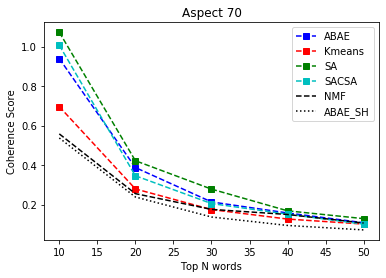

In [34]:
df70=pd.DataFrame(K70)
df70t=df70.T
df70t.columns=Model
df70t['N']=N
df70t

fig, ax = plt.subplots()
df70t.plot(kind='line',x='N',y='ABAE',style='bs--', ax=ax)
df70t.plot(kind='line',x='N',y='Kmeans',style='rs--', ax=ax)
df70t.plot(kind='line',x='N',y='SA',style='gs--', ax=ax)
df70t.plot(kind='line',x='N',y='SACSA',style='cs--', ax=ax)
df70t.plot(kind='line',x='N',y='NMF',style='k--', ax=ax)
df70t.plot(kind='line',x='N',y='ABAE_SH',style='k:', ax=ax)

plt.xlabel('Top N words')
plt.ylabel('Coherence Score')
plt.title('Aspect 70')
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig('WETC Coherence Plots\Plot_per_aspect_size\\Aspect70_WETC.pdf', bbox_inches='tight')

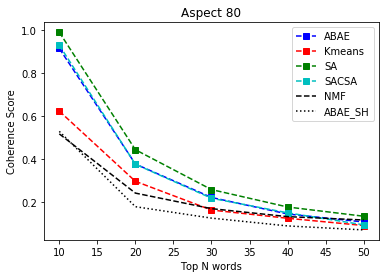

In [35]:
df80=pd.DataFrame(K80)
df80t=df80.T
df80t.columns=Model
df80t['N']=N
df80t

fig, ax = plt.subplots()
df80t.plot(kind='line',x='N',y='ABAE',style='bs--', ax=ax)
df80t.plot(kind='line',x='N',y='Kmeans',style='rs--', ax=ax)
df80t.plot(kind='line',x='N',y='SA',style='gs--', ax=ax)
df80t.plot(kind='line',x='N',y='SACSA',style='cs--', ax=ax)
df80t.plot(kind='line',x='N',y='NMF',style='k--', ax=ax)
df80t.plot(kind='line',x='N',y='ABAE_SH',style='k:', ax=ax)

plt.xlabel('Top N words')
plt.ylabel('Coherence Score')
plt.title('Aspect 80')
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig('WETC Coherence Plots\Plot_per_aspect_size\\Aspect80_WETC.pdf', bbox_inches='tight')

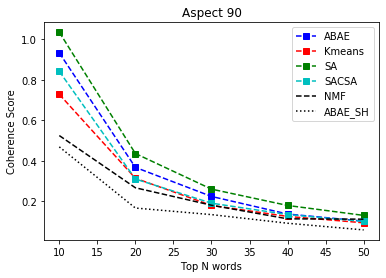

In [36]:
df90=pd.DataFrame(K90)
df90t=df90.T
df90t.columns=Model
df90t['N']=N
df90t

fig, ax = plt.subplots()
df90t.plot(kind='line',x='N',y='ABAE',style='bs--', ax=ax)
df90t.plot(kind='line',x='N',y='Kmeans',style='rs--', ax=ax)
df90t.plot(kind='line',x='N',y='SA',style='gs--', ax=ax)
df90t.plot(kind='line',x='N',y='SACSA',style='cs--', ax=ax)
df90t.plot(kind='line',x='N',y='NMF',style='k--', ax=ax)
df90t.plot(kind='line',x='N',y='ABAE_SH',style='k:', ax=ax)

plt.xlabel('Top N words')
plt.ylabel('Coherence Score')
plt.title('Aspect 90')
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig('WETC Coherence Plots\Plot_per_aspect_size\\Aspect90_WETC.pdf', bbox_inches='tight')

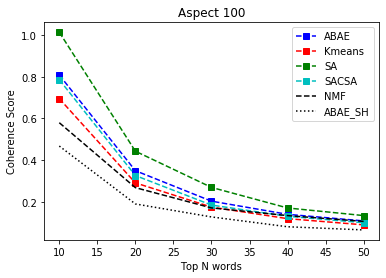

In [37]:
df100=pd.DataFrame(K100)
df100t=df100.T
df100t.columns=Model
df100t['N']=N
df100t

fig, ax = plt.subplots()
df100t.plot(kind='line',x='N',y='ABAE',style='bs--', ax=ax)
df100t.plot(kind='line',x='N',y='Kmeans',style='rs--', ax=ax)
df100t.plot(kind='line',x='N',y='SA',style='gs--', ax=ax)
df100t.plot(kind='line',x='N',y='SACSA',style='cs--', ax=ax)
df100t.plot(kind='line',x='N',y='NMF',style='k--', ax=ax)
df100t.plot(kind='line',x='N',y='ABAE_SH',style='k:', ax=ax)

plt.xlabel('Top N words')
plt.ylabel('Coherence Score')
plt.title('Aspect 100')
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig('WETC Coherence Plots\Plot_per_aspect_size\\Aspect100_WETC.pdf', bbox_inches='tight')

## Area under curve (AUC) for each model and each aspect
#### AUC calculated using Trapezoidal rule

In [22]:
dflist=[dft,df20t,df30t,df40t,df50t,df60t,df70t,df80t,df90t,df100t]

In [23]:
AUC={}
for i in list(dft.columns):
    AUC[i]=[]
AUC

{'ABAE': [],
 'Kmeans': [],
 'SA': [],
 'SACSA': [],
 'NMF': [],
 'ABAE_SH': [],
 'N': []}

In [24]:
from scipy.integrate import simps, trapz
for d in dflist:
    #Trapizium
    x = d['N']
    for i in list(d.columns):
        y= d[i]
        area=np.round(trapz(y,x),3)
        print(i+': ',area)
        AUC[i].append(area)
    print(AUC)
#ax.fill_between(f(xstep), 0, xstep)

ABAE:  9.535
Kmeans:  9.264
SA:  11.133
SACSA:  11.816
NMF:  15.7
ABAE_SH:  16.022
N:  1200.0
{'ABAE': [9.535], 'Kmeans': [9.264], 'SA': [11.133], 'SACSA': [11.816], 'NMF': [15.7], 'ABAE_SH': [16.022], 'N': [1200.0]}
ABAE:  13.414
Kmeans:  8.753
SA:  15.55
SACSA:  13.23
NMF:  11.642
ABAE_SH:  14.673
N:  1200.0
{'ABAE': [9.535, 13.414], 'Kmeans': [9.264, 8.753], 'SA': [11.133, 15.55], 'SACSA': [11.816, 13.23], 'NMF': [15.7, 11.642], 'ABAE_SH': [16.022, 14.673], 'N': [1200.0, 1200.0]}
ABAE:  13.467
Kmeans:  9.488
SA:  14.483
SACSA:  12.832
NMF:  12.242
ABAE_SH:  11.639
N:  1200.0
{'ABAE': [9.535, 13.414, 13.467], 'Kmeans': [9.264, 8.753, 9.488], 'SA': [11.133, 15.55, 14.483], 'SACSA': [11.816, 13.23, 12.832], 'NMF': [15.7, 11.642, 12.242], 'ABAE_SH': [16.022, 14.673, 11.639], 'N': [1200.0, 1200.0, 1200.0]}
ABAE:  13.553
Kmeans:  9.252
SA:  15.332
SACSA:  13.073
NMF:  10.342
ABAE_SH:  9.77
N:  1200.0
{'ABAE': [9.535, 13.414, 13.467, 13.553], 'Kmeans': [9.264, 8.753, 9.488, 9.252], 'SA': [

In [25]:
AUC_table=pd.DataFrame.from_dict(AUC)
AUC_table

,ABAE,Kmeans,SA,SACSA,NMF,ABAE_SH,N
0,9.535,9.264,11.133,11.816,15.700,16.022,1200.0
1,13.414,8.753,15.550,13.230,11.642,14.673,1200.0
2,13.467,9.488,14.483,12.832,12.242,11.639,1200.0
3,13.553,9.252,15.332,13.073,10.342,9.770,1200.0
4,12.394,9.583,14.565,11.503,10.087,7.968,1200.0
5,12.493,9.596,14.580,11.797,9.203,7.589,1200.0
6,12.822,9.794,14.698,12.566,9.132,7.742,1200.0
7,12.573,9.456,14.434,12.590,8.651,6.978,1200.0
8,12.483,10.325,14.599,11.089,8.820,6.598,1200.0
9,11.490,9.752,14.546,10.821,9.136,6.619,1200.0


In [26]:
AUC_table=AUC_table.drop(labels='N',axis=1)

#### AUC

In [29]:
AUC_table

,ABAE,Kmeans,SA,SACSA,NMF,ABAE_SH
0,9.535,9.264,11.133,11.816,15.700,16.022
1,13.414,8.753,15.550,13.230,11.642,14.673
2,13.467,9.488,14.483,12.832,12.242,11.639
3,13.553,9.252,15.332,13.073,10.342,9.770
4,12.394,9.583,14.565,11.503,10.087,7.968
5,12.493,9.596,14.580,11.797,9.203,7.589
6,12.822,9.794,14.698,12.566,9.132,7.742
7,12.573,9.456,14.434,12.590,8.651,6.978
8,12.483,10.325,14.599,11.089,8.820,6.598
9,11.490,9.752,14.546,10.821,9.136,6.619


#### Aggregate AUC for each model

In [62]:
AUC_table.sum(axis=0)

ABAE      124.224
Kmeans     95.263
SA        143.920
SACSA     121.317
NMF       104.955
dtype: float64